In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
file = pd.read_csv('diabetes.csv')
file.shape

(768, 9)

## Snapshot of the dataset

In [3]:
file.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Distribution

In [4]:
file.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

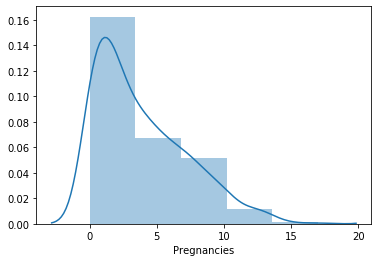

In [5]:
sns.distplot(file['Pregnancies'],bins=5)
plt.show()

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking whether data contains any null value

In [7]:
file.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
file.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualisations

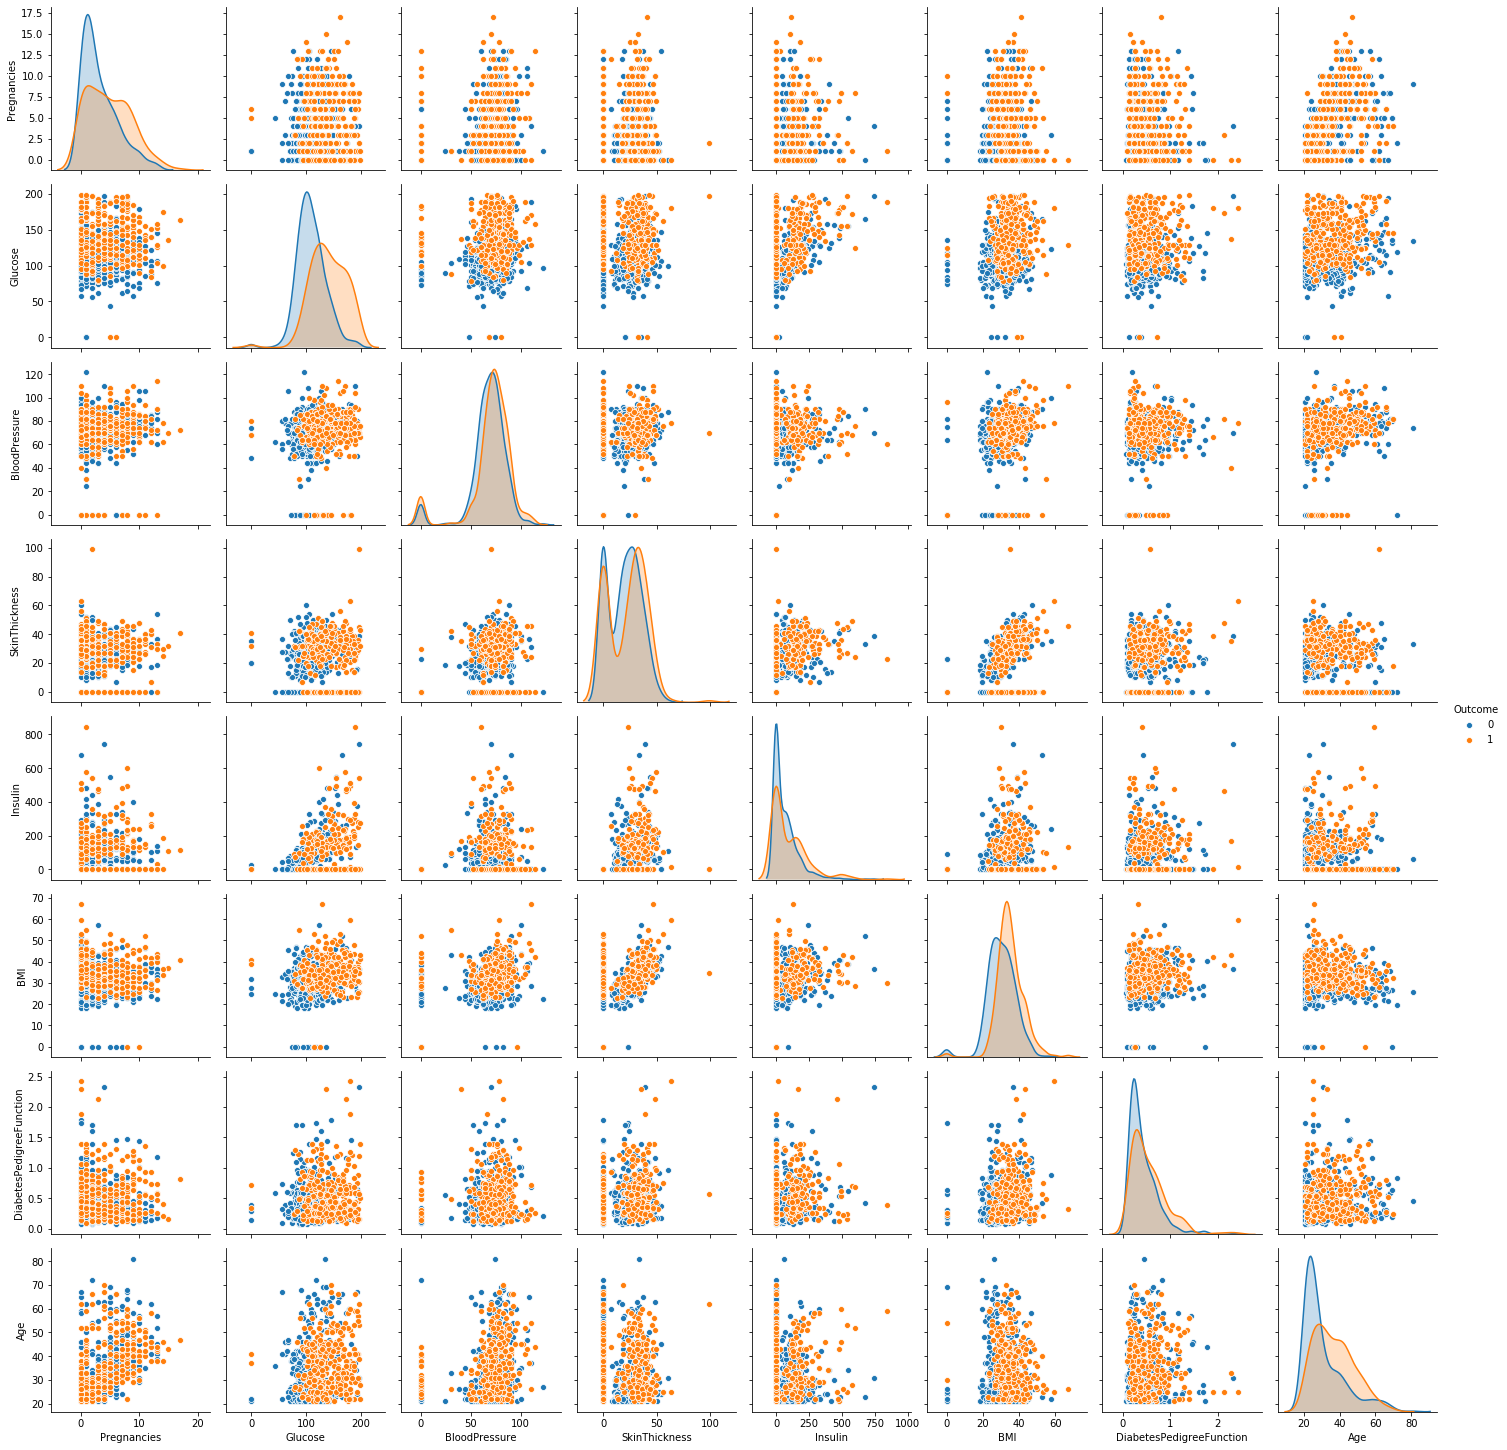

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.pairplot(file,diag_kind='kde',hue='Outcome')

## Box Plots

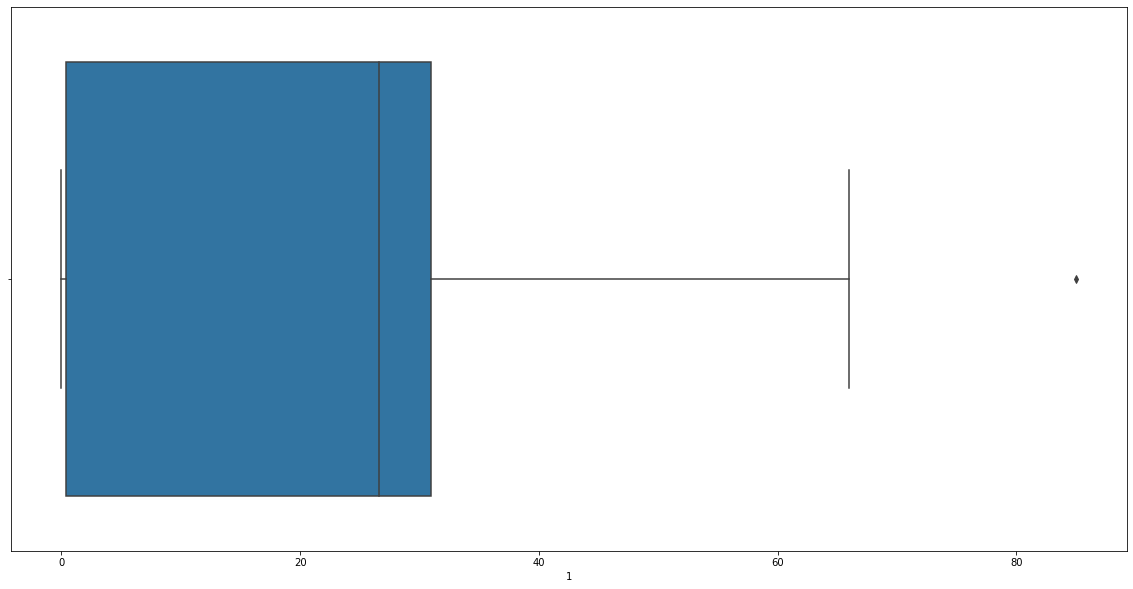

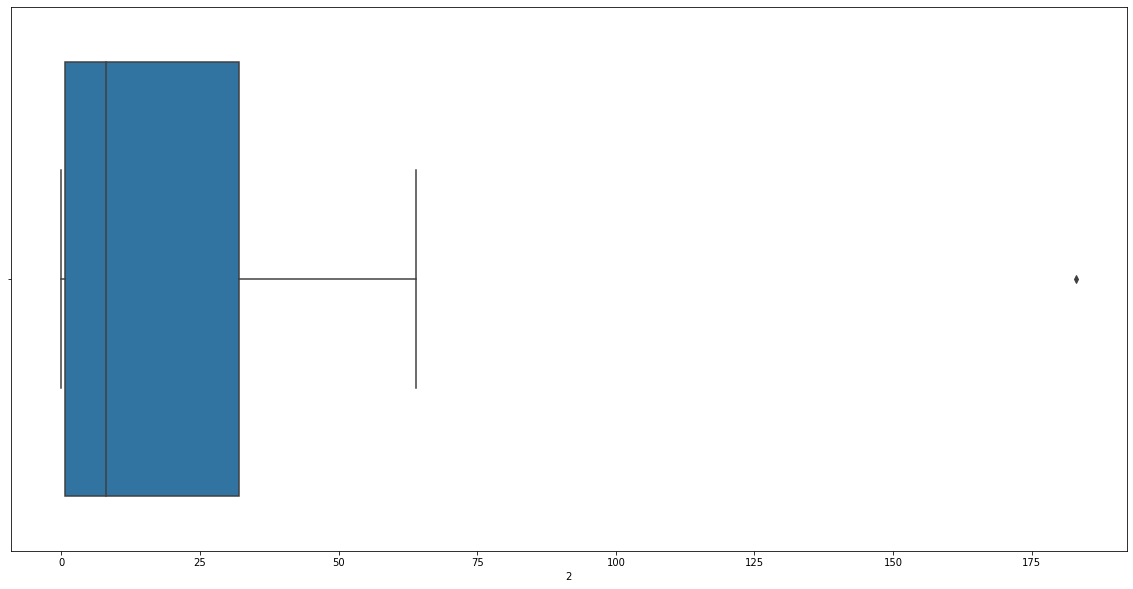

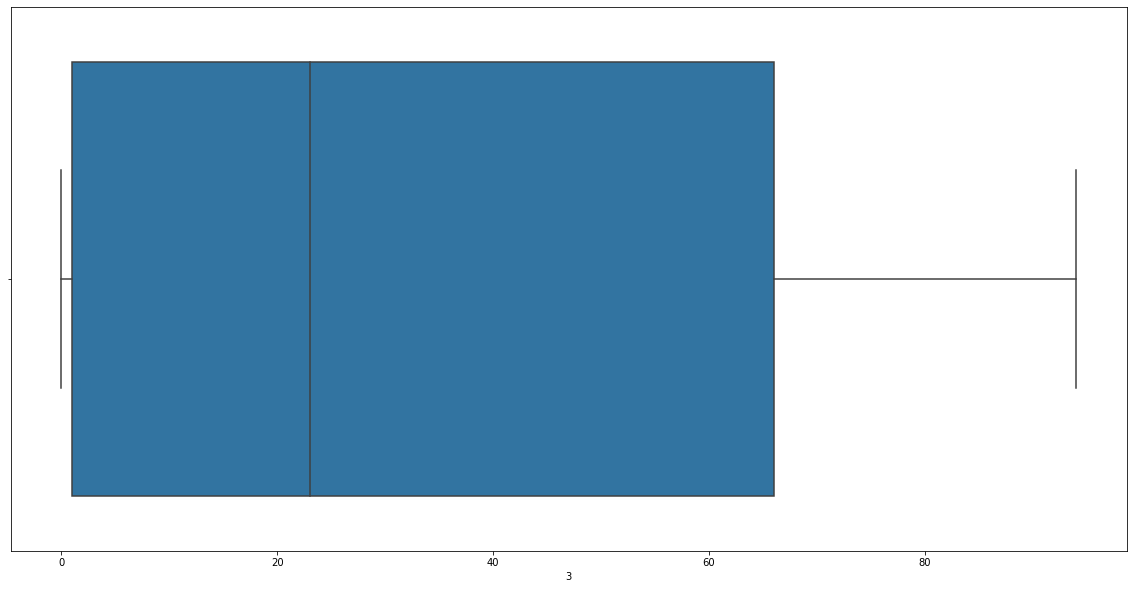

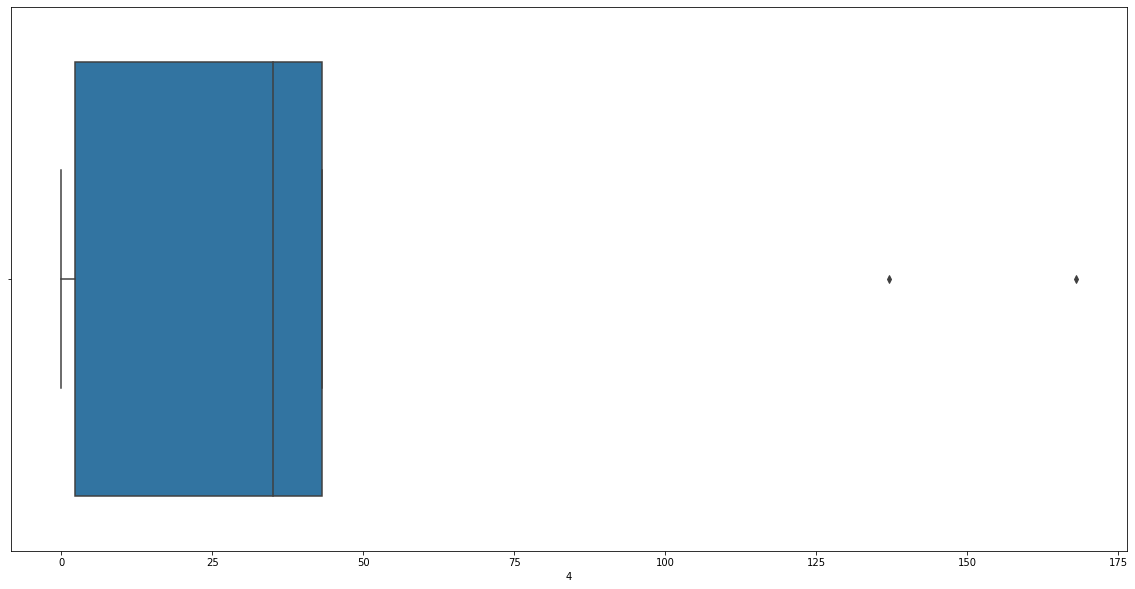

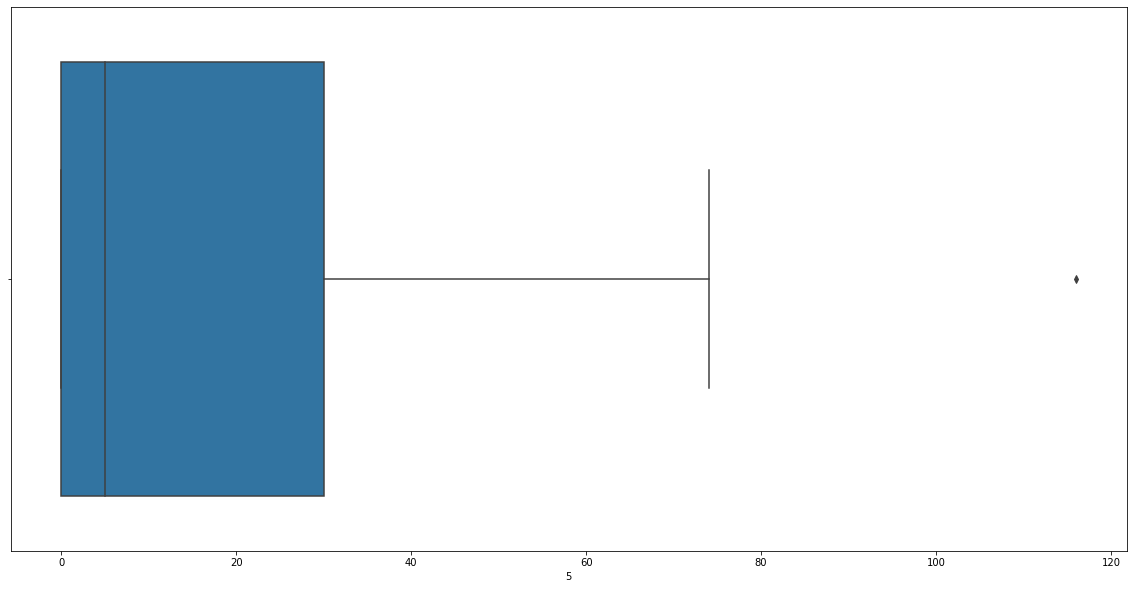

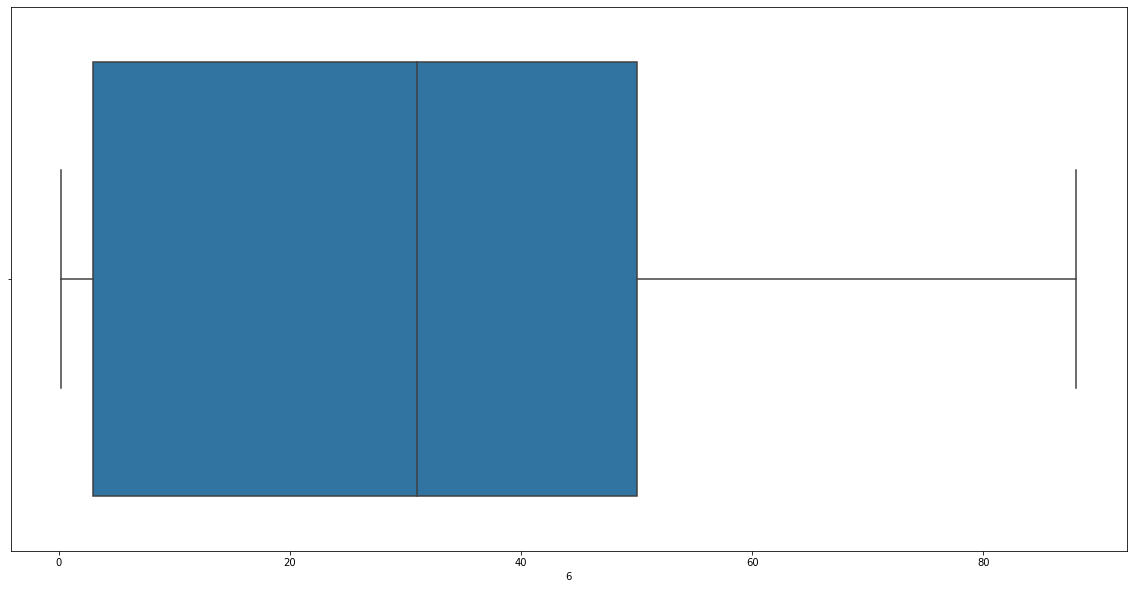

In [10]:
for i in range(1, 7):
    fig,ax =plt.subplots(figsize=(20,10))
    ax =sns.boxplot(file.iloc[i])

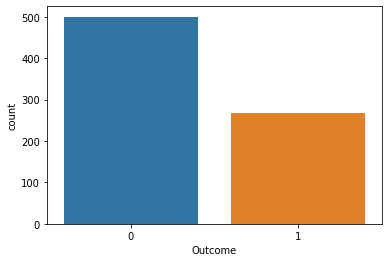

In [11]:
sns.countplot(file['Outcome'])

In [12]:
file_1 = file.drop('Outcome',axis=1)

## Correlation Bar Graph

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

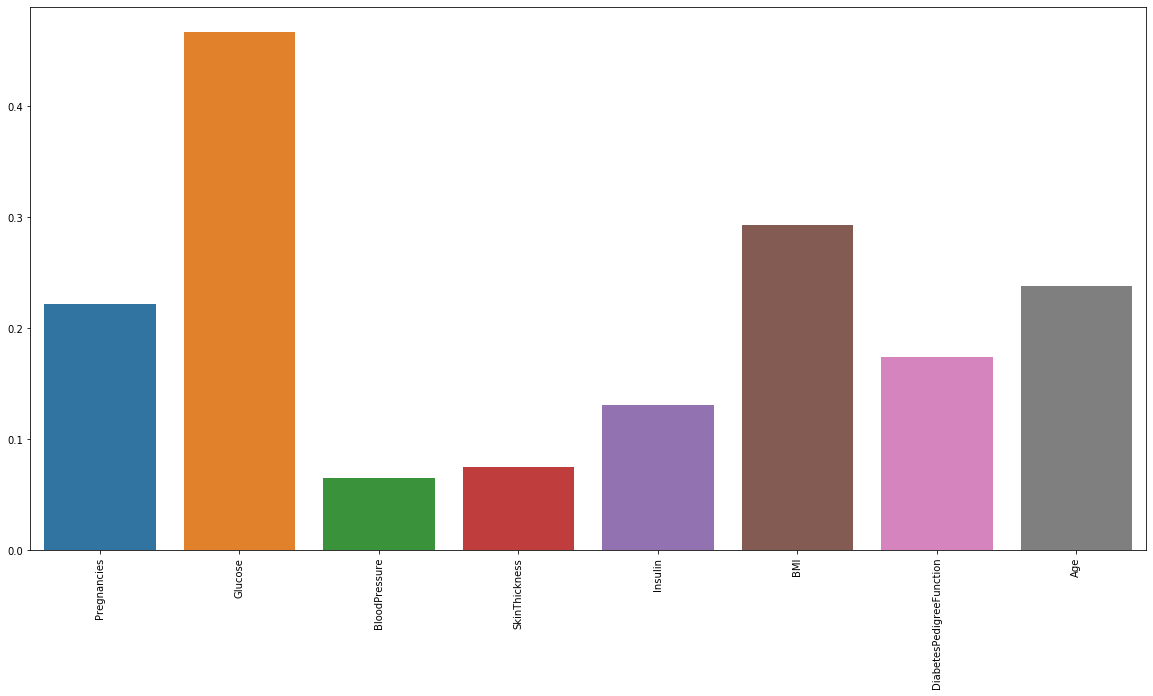

In [13]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(file_1.corrwith(file.Outcome).index,file_1.corrwith(file.Outcome))
plt.xticks(rotation=90)
# We can see that every feature in the dataset has a positive correlation with the Outcome Feature.

## Feature Selection

As We Can see Blood Pressure does not have a much impact on whether person has diabetes or not.We can drop this feature.

In [14]:
X = file.drop(['Outcome','BloodPressure'],axis=1) #Feature Variables
y = file['Outcome']

In [15]:
X.columns

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Feature Scaling

Using Standardisation ie StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [17]:
X = pd.DataFrame(X,columns = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'])

In [18]:
X.describe().round()

Pregnancies  Glucose  SkinThickness  Insulin    BMI  \
count        768.0    768.0          768.0    768.0  768.0   
mean           0.0      0.0            0.0     -0.0    0.0   
std            1.0      1.0            1.0      1.0    1.0   
min           -1.0     -4.0           -1.0     -1.0   -4.0   
25%           -1.0     -1.0           -1.0     -1.0   -1.0   
50%           -0.0     -0.0            0.0     -0.0    0.0   
75%            1.0      1.0            1.0      0.0    1.0   
max            4.0      2.0            5.0      7.0    4.0   

       DiabetesPedigreeFunction    Age  
count                     768.0  768.0  
mean                        0.0    0.0  
std                         1.0    1.0  
min                        -1.0   -1.0  
25%                        -1.0   -1.0  
50%                        -0.0   -0.0  
75%                         0.0    1.0  
max                         6.0    4.0

In [19]:
print(X.head())

   Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [20]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [21]:
X

Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055       0.907270  0.765836  1.409746   
..           ...       ...            ...       ...       ...   
763     1.827813 -0.622642       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 7 columns]

In [22]:
from sklearn.impute import SimpleImputer

replace_0 = SimpleImputer(missing_values=0,strategy='mean')
columns = X.columns

X = pd.DataFrame(replace_0.fit_transform(X))
X.columns = columns
X #data is now prepared for splitting.

Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055       0.907270  0.765836  1.409746   
..           ...       ...            ...       ...       ...   
763     1.827813 -0.622642       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 7 columns]

In [37]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.30,random_state = 42)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(537, 7)
(537,)
(231, 7)
(231,)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression(solver='liblinear')
model.fit(train_X,train_y)
y_pred_log = model.predict(test_X)
print(model.score(train_X,train_y))
print(model.score(test_X,test_y))
print(confusion_matrix(test_y,y_pred_log))

0.776536312849162
0.7402597402597403
[[123  28]
 [ 32  48]]


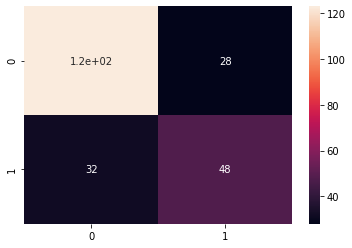

In [103]:
sns.heatmap(confusion_matrix(test_y,y_pred_log),annot=True)

In [105]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(train_X,train_y)
y_pred_dt = dtc.predict(test_X)
dtc.score(test_X,test_y)

0.6536796536796536

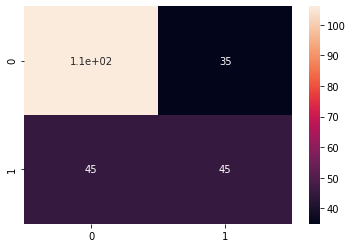

In [107]:
sns.heatmap(confusion_matrix(y_pred_dt,test_y),annot=True)

In [111]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_X,train_y)
y_pred_nb = nb.predict(test_X)
nb.score(test_X,test_y)

0.7489177489177489

## Principle Component Analysis

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

In [96]:
pca_X.shape

(768, 2)

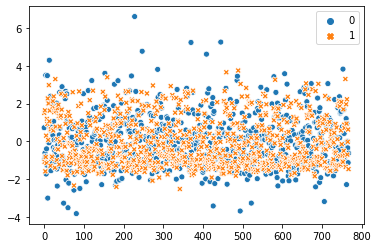

In [97]:
sns.scatterplot(data=pca_X,hue=file['Outcome'])

In [98]:
train_X_pca,test_X_pca,train_y_pca,test_y_pca = train_test_split(pca_X,y,test_size=0.30,random_state = 42)

In [99]:
print(train_X_pca.shape)
print(test_X_pca.shape)
print(train_y_pca.shape)
print(test_y_pca.shape)

(537, 2)
(231, 2)
(537,)
(231,)


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X_pca,train_y_pca)
y_pred_pca = knn.predict(test_X_pca)

In [101]:
print(knn.score(train_X_pca,train_y_pca))
print(knn.score(test_X_pca,test_y_pca))
print(confusion_matrix(test_y_pca,y_pred_pca))

0.8361266294227188
0.6883116883116883
[[114  37]
 [ 35  45]]


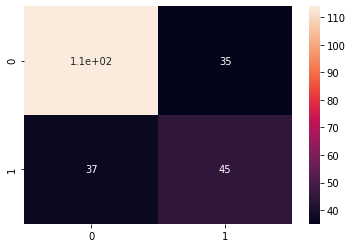

In [102]:
sns.heatmap(confusion_matrix(y_pred_pca,test_y_pca),annot=True)

In [103]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_X_pca,train_y_pca)
y_pred_nb = nb.predict(test_X_pca)
nb.score(test_X_pca,test_y_pca)

0.70995670995671